In [2]:
### Importing modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import warnings
warnings.filterwarnings('always')

In [4]:
import sklearn
print(sklearn.__version__)

0.20.0


### Reading the Chronic kidney disease dataset file (.csv format)

In [5]:
df = pd.read_csv('kidney_disease.csv')

### Displaying first 5 rows of our dataset to make sure whether the file is read

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### All columns which are present in dataset displayed

In [7]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

All 26 columns/attributes named above as shown

### Further information checked regarding our attributes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

### many null values, some of the attributes are of object type, others as that of float

In [9]:
df.describe

<bound method NDFrame.describe of       id   age     bp     sg   al   su       rbc        pc         pcc  \
0      0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent   
1      1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent   
2      2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent   
3      3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present   
4      4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent   
5      5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent   
6      6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
7      7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent   
8      8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present   
9      9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present   
10    10  50.0   60.0  1.010  2.0  4.0       NaN  abnormal     present   
11    11  63.0   70.0  1.010  3.0  0.0  abnormal  abnormal     present   
12  

In [10]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

### working on null values first
#### plotting a heatmap using seaborn module of those features which are missing

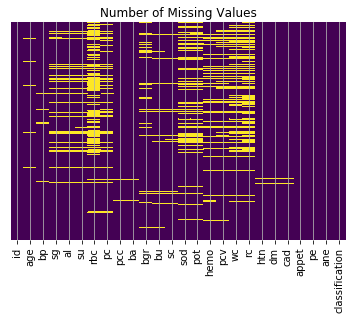

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')

#### the darker shade of yellow symbolizing more of those null values present in those attributes

In [13]:
df.describe(include='all')

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Min, Max values can be seen and shows that there is a major difference in that for some attributes, it will be worked upon later.
### First , trying to remove all null values starting with the nominal or discrete attributes

In [14]:
df.rc.head()

0    5.2
1    NaN
2    NaN
3    3.9
4    4.6
Name: rc, dtype: object

In [15]:
df.wc.head()

0    7800
1    6000
2    7500
3    6700
4    7300
Name: wc, dtype: object

In [16]:
df.pcv.head()

0    44
1    38
2    31
3    32
4    35
Name: pcv, dtype: object

#### These three features although are of int/float type, they're actually saved as object type,
#### So, coverting these three features as of float type first then working on nominal values to be non-null completely

In [17]:
for i in ['rc','wc','pcv']:
    df[i] = df[i].str.extract('(\d+)').astype(float)

<input>:2: DeprecationWarning: invalid escape sequence \d
<input>:2: DeprecationWarning: invalid escape sequence \d
<input>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-17-1511fe8d4815>:2: DeprecationWarning: invalid escape sequence \d
  df[i] = df[i].str.extract('(\d+)').astype(float)


In [18]:
df.pcv.head()

0    44.0
1    38.0
2    31.0
3    32.0
4    35.0
Name: pcv, dtype: float64

#### changed to float type

### Now, filling out the null values in all those attributes which are of discrete type

#### Mean value of that particular attribute is calculated and filled out correspondingly


In [19]:
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[i].fillna(df[i].mean(),inplace=True) # mean value calculation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               400 non-null float64
bp                400 non-null float64
sg                400 non-null float64
al                400 non-null float64
su                400 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               400 non-null float64
bu                400 non-null float64
sc                400 non-null float64
sod               400 non-null float64
pot               400 non-null float64
hemo              400 non-null float64
pcv               400 non-null float64
wc                400 non-null float64
rc                400 non-null float64
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe      

### All float type attributes are non null as shown above. Hence null values removed for all discrete type attributes

### Working on the categorical attributes now

#### - We filled null cells with the most frequently used value within the underlying attribute

#### -Doing so one by one manually for each categorical attribute, by checking each attribute's unique values present in it and filling out null values with the value which is present in max. no. :

#### 1. rbc

In [21]:
df['rbc'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

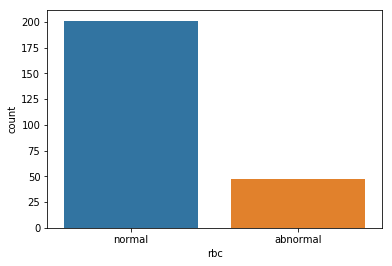

In [22]:
sns.countplot(data=df,x='rbc')

In [23]:
df['rbc'].fillna('normal',inplace=True)

#### 2. pc

In [24]:
df['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

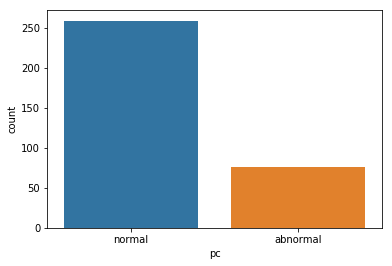

In [25]:
sns.countplot(data=df,x='pc')

In [26]:
df['pc'].fillna('normal',inplace=True)

#### 3. pcc

In [27]:
df['pcc'].unique()

array(['notpresent', 'present', nan], dtype=object)

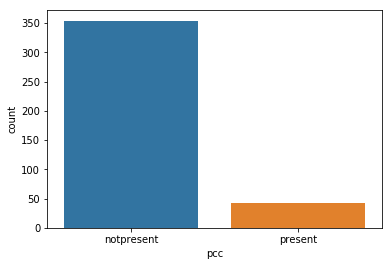

In [28]:
sns.countplot(data=df,x='pcc')

In [29]:
df['pcc'].fillna('notpresent',inplace=True)

#### 4. ba

In [30]:
df['ba'].unique()

array(['notpresent', 'present', nan], dtype=object)

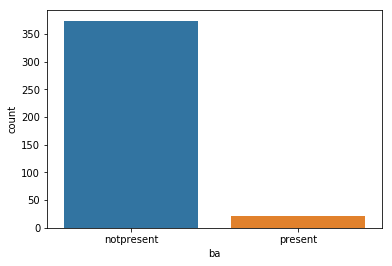

In [31]:
sns.countplot(data=df,x='ba')

In [32]:
df['ba'].fillna('notpresent',inplace=True)

#### 5. htn

In [33]:
df['htn'].unique()

array(['yes', 'no', nan], dtype=object)

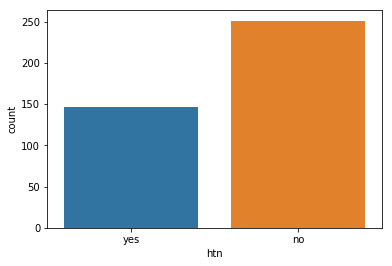

In [34]:
sns.countplot(data=df,x='htn')

In [35]:
df['htn'].fillna('no',inplace=True)

#### 6. dm

In [36]:
df['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [37]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) # changing \tyes and \tno to yes and no

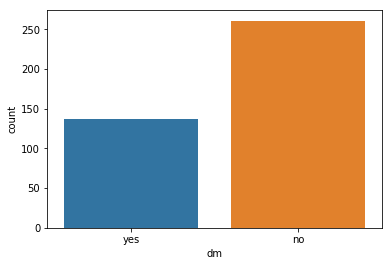

In [38]:
sns.countplot(data=df,x='dm')

In [39]:
df['dm'].fillna('no',inplace=True)

#### 7. cad

In [40]:
df['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [41]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

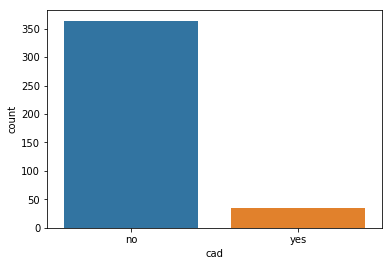

In [42]:
sns.countplot(data=df,x='cad')

In [43]:
df['cad'].fillna('no',inplace=True)

#### 8. appet

In [44]:
df['appet'].unique()

array(['good', 'poor', nan], dtype=object)

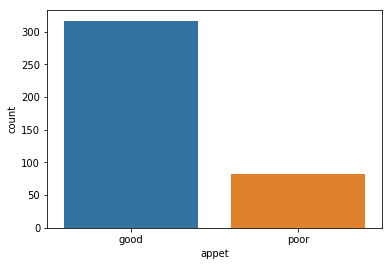

In [45]:
sns.countplot(data=df,x='appet')

In [46]:
df['appet'].fillna('good',inplace=True)

#### 9. pe

In [47]:
df['pe'].unique()

array(['no', 'yes', nan], dtype=object)

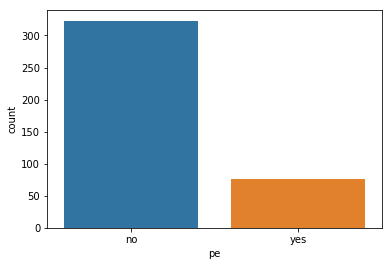

In [48]:
sns.countplot(data=df,x='pe')

In [49]:
df['pe'].fillna('no',inplace=True)

### 10. ane

In [50]:
df['ane'].unique()

array(['no', 'yes', nan], dtype=object)

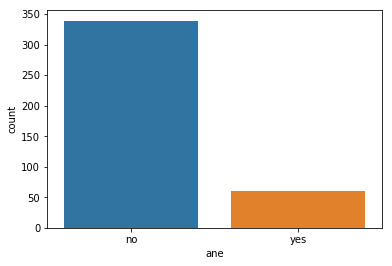

In [51]:
sns.countplot(data=df,x='ane')

In [52]:
df['ane'].fillna('no',inplace=True)

#### 11. cad

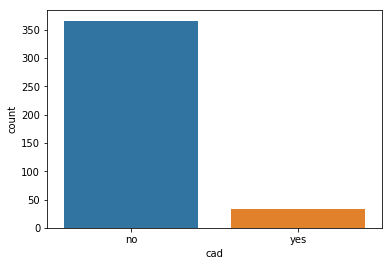

In [53]:
sns.countplot(data=df,x='cad')

In [54]:
df['cad'] = df['cad'].replace(to_replace='ckd\t',value='ckd')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               400 non-null float64
bp                400 non-null float64
sg                400 non-null float64
al                400 non-null float64
su                400 non-null float64
rbc               400 non-null object
pc                400 non-null object
pcc               400 non-null object
ba                400 non-null object
bgr               400 non-null float64
bu                400 non-null float64
sc                400 non-null float64
sod               400 non-null float64
pot               400 non-null float64
hemo              400 non-null float64
pcv               400 non-null float64
wc                400 non-null float64
rc                400 non-null float64
htn               400 non-null object
dm                400 non-null object
cad               400 non-null object
appet             400 non-null object
pe      

In [56]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### As we can see, there isn't any null value now, even for the categorical ones
## Hence, All null values are removed from the dataset

### Now transformation of categorical features needs to be done.

In [57]:
# Map text to 1/0 and do some cleaning
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [58]:
df.drop('id',inplace=True,axis=1)
df['pe'] = df['pe'].replace(to_replace='good',value=0)

In [59]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,44.0,7800.0,5.000000,1,1,0,1,0,0,1.0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,...,38.0,6000.0,4.241636,0,0,0,1,0,0,1.0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,31.0,7500.0,4.241636,0,1,0,0,0,1,1.0
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,...,32.0,6700.0,3.000000,1,0,0,0,1,1,1.0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,35.0,7300.0,4.000000,0,0,0,1,0,0,1.0


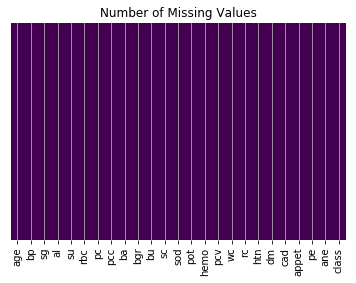

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.grid()
plt.title("Number of Missing Values")
plt.savefig('missing.png')

## No missing values in heatmap now, hence removed null values

In [61]:
df['dm'].replace('yes',1,inplace=True)
df['dm'].replace('no',0,inplace=True)

# Categorical attributes converted into nominal type

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null float64
bp       400 non-null float64
sg       400 non-null float64
al       400 non-null float64
su       400 non-null float64
rbc      400 non-null int64
pc       400 non-null int64
pcc      400 non-null int64
ba       400 non-null int64
bgr      400 non-null float64
bu       400 non-null float64
sc       400 non-null float64
sod      400 non-null float64
pot      400 non-null float64
hemo     400 non-null float64
pcv      400 non-null float64
wc       400 non-null float64
rc       400 non-null float64
htn      400 non-null int64
dm       400 non-null int64
cad      400 non-null int64
appet    400 non-null int64
pe       400 non-null int64
ane      400 non-null int64
class    400 non-null float64
dtypes: float64(15), int64(10)
memory usage: 78.2 KB


## Now we'll scale those features who have a greater difference in their minimum and maximum values since they can cause a greater difference in accuracy

In [63]:
d=df[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']]

#### took the discrete features only who aren't categorical in their values, i.e. possessing different values in order to see their min max ratio

In [64]:
d.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc,wc,pcv
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,4.241636,8406.122449,38.884498
std,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,0.888937,2523.219976,8.151081
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2.000000,2200.000000,9.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,4.000000,6975.000000,34.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,4.241636,8406.122449,38.884498
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,5.000000,9400.000000,44.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,8.000000,26400.000000,54.000000


### as we can clearly see here, that some features have a great difference in their min and max values

In [65]:
i=['age','bp','su','bgr','bu','sc','sod','pot','hemo','wc','pcv']

#### using MinMaxScaler()

In [66]:
for i in df[['age','bp','su','bgr','bu','sc','sod','pot','hemo','wc','pcv']]:
    df[i] = MinMaxScaler().fit_transform(df[i].astype(float).values.reshape(-1, 1))

In [67]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.562311,0.203608,1.017408,1.016949,0.090028,0.117500,0.190000,0.105000,0.055000,0.269309,...,0.664100,0.256451,4.241636,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000
std,0.192897,0.103664,0.005369,1.272318,0.205897,0.322418,0.392792,0.306937,0.228266,0.159792,...,0.181135,0.104265,0.888937,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,0.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.153846,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168803,...,0.555556,0.197314,4.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.590909,0.217189,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,...,0.664100,0.256451,4.241636,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.704545,0.230769,1.020000,2.000000,0.090028,0.000000,0.000000,0.000000,0.000000,0.273504,...,0.777778,0.297521,5.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.025000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### checking by displaying the changed dataset

In [68]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,1.020,1.0,0.0,0,0,0,0,0.211538,...,0.777778,0.231405,5.000000,1,1,0,1,0,0,1.0
1,0.056818,0.000000,1.020,4.0,0.0,0,0,0,0,0.269309,...,0.644444,0.157025,4.241636,0,0,0,1,0,0,1.0
2,0.681818,0.230769,1.010,2.0,0.6,0,0,0,0,0.856838,...,0.488889,0.219008,4.241636,0,1,0,0,0,1,1.0
3,0.522727,0.153846,1.005,4.0,0.0,0,1,1,0,0.202991,...,0.511111,0.185950,3.000000,1,0,0,0,1,1,1.0
4,0.556818,0.230769,1.010,2.0,0.0,0,0,0,0,0.179487,...,0.577778,0.210744,4.000000,0,0,0,1,0,0,1.0


### The discrete values are scaled now , those attributes which had a larger difference in their min and max values are scaled using MinMaxScaler( ) which is a function of ski-kit module

.

.

# <i> CLASSIFICATION <i>

### 1. K-Nearest Neighbor Classification

In [69]:
X=df.drop('class',axis=1).values
y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42) # splitting dataset
knn = KNeighborsClassifier(n_neighbors=4)          #randomly taking value of k_neighbors
knn.fit(X_train, y_train)                           
knn.score(X_test,y_test)

0.9242424242424242

#### tuning the paramater using gridsearchcv

In [93]:
k_range = list(range(2, 25))              #taking values of n_neighbors from 2-24 in order to test the best
knn = KNeighborsClassifier()                
param_grid = dict(n_neighbors=k_range)
clf = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',iid=True)
clf.fit(X_train, y_train)
KNN=clf.score(X_test,y_test)
print('Best value of k_neighbors is',clf.best_params_)  #displaying the best value of the n_neighbors possible
print('Best accuracy is ',KNN)

Best value of k_neighbors is {'n_neighbors': 3}
Best accuracy is  0.939393939394


#### The accuracy through KNN is thereby calculated.

.

### 2. Naive Bayes Classification

In [92]:
clf = GaussianNB(priors=None,var_smoothing=1e-4) ## We kept on changing the values of
                                                 ## parameters manually and this was the best possible choice
clf.fit(X_train, y_train)
NB=clf.score(X_test,y_test)
print(NB)

0.969696969697


#### This was the best possible accuracy obtained by using Naive Bayes Classifier

.

### 3. Decision Tree

In [70]:
X=df.drop('class',axis=1).values
y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
clf_tree.score(X_test,y_test)

0.98484848484848486

In [71]:
clf.get_params # all parameters under decision tree classifier

<bound method BaseEstimator.get_params of GaussianNB(priors=None, var_smoothing=0.0001)>

#### getting the best important parameter values

In [72]:
tuned_parameters = [{'max_leaf_nodes':[4,5,6,7,8,9,10,11],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[24,42]}]
clf_tree = GridSearchCV(tree.DecisionTreeClassifier(), tuned_parameters, cv=5,scoring='f1',iid=True)
clf_tree.fit(X_train, y_train)
print (clf_tree.best_params_)  # displaying best possible parameters

{'class_weight': 'balanced', 'max_depth': 3, 'max_leaf_nodes': 7, 'random_state': 24}


#### obtained the best possible important parameters above.

In [94]:
X=df.drop('class',axis=1).values
y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42)
clf_tree = tree.DecisionTreeClassifier(class_weight='balanced', max_depth= 3, max_leaf_nodes=7,random_state= 24)
clf_tree.fit(X_train, y_train)
DT=clf_tree.score(X_test,y_test)
print(DT)

0.977272727273


#### This was the best possible accuracy through decision trees classification

.

### 4. Random Forest Classification

#### trying classification without tuning


In [74]:
X=df.drop('class',axis=1).values
y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42) # splitting dataset into 2 
cl = RandomForestClassifier(n_estimators=2,class_weight='balanced',max_depth=4, random_state=42)
cl.fit(X_train,y_train)
preds = cl.predict(X_test)
cl.score(X_test, y_test)

0.95454545454545459

#### Parameters are to be tuned

In [75]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[24,42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,scoring='f1',iid=True)
clf.fit(X_train, y_train)
print (clf.best_params_)  # displaying best possible parameters
clf_best = clf.best_estimator_

{'class_weight': {0: 0.33, 1: 0.67}, 'max_depth': 5, 'n_estimators': 10, 'random_state': 42}


#### Selecting best features that contribute in classification for random forest


In [76]:
feature_names=df.columns.values.tolist()
feature_names=feature_names[:-1]

Text(0.5,1,'Feature Importance')

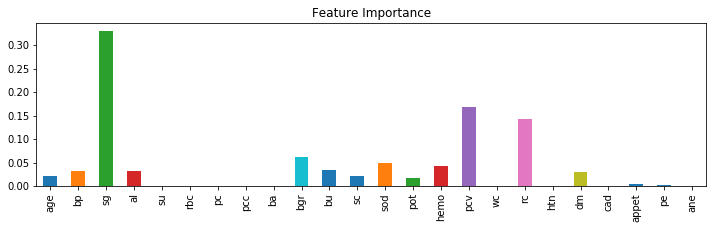

In [77]:
plt.figure(figsize=(12,3))
importance = clf_best.feature_importances_.tolist()
feature_series = pd.Series(data=importance,index=feature_names)
feature_series.plot.bar()
plt.title('Feature Importance')

### Obtained the best possible features that can be used for Random forest classifier

In [78]:
list_to_fill = feature_series[feature_series>0]
print(list_to_fill)

age      0.021293
bp       0.032876
sg       0.330765
al       0.033053
rbc      0.001278
bgr      0.061836
bu       0.034872
sc       0.022701
sod      0.050227
pot      0.016639
hemo     0.043130
pcv      0.168674
wc       0.000839
rc       0.142485
htn      0.000359
dm       0.031157
appet    0.005185
pe       0.002631
dtype: float64


### Tuned Random forest classifier  :

#### without using the important features, i.e. using the entire dataset in training, we get

In [79]:
Y=df['class'].values
X=df.drop('class',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,random_state=24)
cl = RandomForestClassifier(n_estimators=13,class_weight='balanced',max_depth=6,random_state=24)
cl.fit(X_train,y_train)
preds = cl.predict(X_test)
cl.score(X_test, y_test)

0.98484848484848486

#### using the important features, we get 

In [90]:
Y=df['class'].values
X=df[['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'appet', 'pe'] ].values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=24)
cl = RandomForestClassifier(n_estimators=13,class_weight='balanced',max_depth=6,random_state=24)
cl.fit(X_train,y_train)
preds = cl.predict(X_test)
RF=cl.score(X_test, y_test)
print(RF)

0.991666666667


#### We were able to obtain this much accuracy under the usage of certain features and tuning the hyperparameters in case of Random Forest

.

## Logistic Regression Classification

In [81]:
X=df.drop('class',axis=1).values
y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42) # splitting dataset
clf_l=LogisticRegression(solver='liblinear')
clf_l.fit(X_train,y_train)
print(clf_l.score(X_test,y_test))
print(clf_l.get_params)

0.939393939394
<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)>


#### Now, tuning parameters

In [82]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(LogisticRegression(), hyperparameters, cv=5,scoring='f1',iid=True)
clf.fit(X_train, y_train)
print (clf.best_params_)  # displaying best possible parameters

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a s

{'C': 3593.8136638046258, 'penalty': 'l2'}


C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a s

#### Found    the best combination of parameters through Grid search cross validation

In [88]:
X=df.drop('class',axis=1).values
y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42) # splitting dataset
clf_l=LogisticRegression(C=3593.8136638046258,penalty='l2',solver='liblinear')
clf_l.fit(X_train,y_train)
LR=clf_l.score(X_test,y_test)
print(LR)

0.984848484848


#### This was the best accuracy through tuned Logistic Regression Classifier


.

## SVM Classification

#### using classifier directly by importing it using sklearn module and without any tuning of its hyperparameters :

In [84]:
X=df.drop('class',axis=1).values
Y=df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=24)

clf = svm.SVC(gamma='auto')

clf.fit(X_train,y_train)
preds = clf.predict(X_test)
clf.score(X_test, y_test)

0.92500000000000004

###  Tuning of parameters using cross validation and GridSearchCV()

In [85]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'],'gamma': [1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, iid=True, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

# Tuning hyper-parameters for precision



C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Deepanshu\Anaconda3\lib\sit

C:\Users\Deepanshu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid'}

Grid scores on development set:

0.302 (+/-0.005) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.302 (+/-0.005) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.937 (+/-0.025) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.920 (+/-0.036) for

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=24)

clf = svm.SVC(kernel="sigmoid", gamma=0.01 , C=1000 , random_state=24)

clf.fit(X_train,y_train)
preds = clf.predict(X_test)
SVM=clf.score(X_test, y_test)
print(SVM)

0.975


### We were able to provide with this accuracy after tuning under SVM classification

In [1]:
label=['KNN','Naive\n Bayes','Decision\n Tree','Random\n forest','SVM','LR']
data=[KNN,NB,DT,RF,SVM,LR]
print (data)

NameError: name 'KNN' is not defined

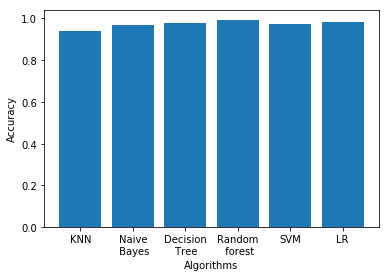

In [126]:
axes = plt.gca()
#axes.set_ylim([0,1])
index = np.arange(len(label))
plt.bar(index, data)
#plt.yticks(np.arange(0,1,0.1))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(index, label)
plt.title('')
plt.show()

In [ ]:
print(index)